In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


### Q1. Read the data from the h5py file and understand the train/test splits (5 points)

In [2]:
import h5py
import numpy as np

h5f = h5py.File("/content/drive/My Drive/ColabNotebooks/SVHN_single_grey1.h5", 'r')

X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

#### H5PY are homogeneous collections of data elements, with an immutable datatype and (hyper)rectangular shape. This is suitable to store image related information in the form of pixel values. The train, test and validation splits are internally defined in the data itself.

#### Print the train, test and validation shapes 

In [3]:
for i in list(h5f.keys()):
  dset = h5f[i]
  print(i,dset.shape)

X_test (18000, 32, 32)
X_train (42000, 32, 32)
X_val (60000, 32, 32)
y_test (18000,)
y_train (42000,)
y_val (60000,)


In [4]:
## Importing the required basic libaries for data processing
import numpy as np
from keras.utils import np_utils

#### The biggest problem of Neural network algorithms is that they are stochastic because of randomness in initialization, such as weights,in Layers, in Regularization etc. Fix random seed for reproducibility

In [ ]:
seed = 1
np.random.seed(seed)

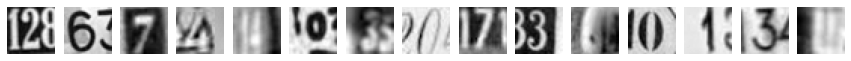

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [5]:
# Visualizing the first 15 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:15]))

#### The label of each image is the corresponding digit in the middle of the image. 

### Q2. Reshape and normalize the train and test features (5 points)

#### Flattening is required to convert the data into 1D array, before passing it as input 

In [6]:
print('Training set', X_train.shape, y_train1.shape) #Before Reshaping 
print('Test set', X_test.shape, y_test1.shape) #Before Reshaping 

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


In [7]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

#### After reshaping the 32X32 pixels are flattenned into 1024 pixel values.This can be achieved either via reshape command 

In [8]:
print('Training set', X_train.shape, y_train1.shape) #After Reshaping 
print('Test set', X_test.shape, y_test1.shape) #After Reshaping 

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


### Q3.One hot encode the labels for train and test data (5 points)

#### One hot coding means converting the digits into binary code. For instance 1 will be converted as 0000000001 and so on. This is a preprocessing step.

In [9]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

#### Total number of classes will be total number of digits 0 to 9 : 10 classes

In [10]:
# no.of classes
num_classes = y_test.shape[1]

In [34]:
# Import the required libraries
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### Q4. Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax (5 points)

In [35]:
# define model

def nn_model():
    # create model
    model = Sequential() #In Sequential approach we attach the layers one after the other
    model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons
    model.add(Flatten()) #flatten layer as asked in the question, this layer transforms the matrix to a vector
    model.add(Dense(512, activation='relu'))   #Second hidden layer of 512  neurons, each neuron

    model.add(Dense(num_classes, activation='softmax'))# output layer also uses softmax. This normalizes 
    #the values from the ten output nodes such that all the values are between 0 and 1, and the sum of all ten values is 1.         
   
    adam = Adam(lr=0.0001) #Learning Rate : 0.0001

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= adam , metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model


### Q5. Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation (5 points)

In [22]:
## Done inside the nn_model function definition

### Q6. Fit and evaluate the model. Print the loss and accuracy for the test data (5 points)

In [36]:
# build the model
model = nn_model()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=256, verbose=1 )

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

model.summary()

Epoch 1/30
165/165 [==============================] - 8s 51ms/step - loss: 2.2165 - accuracy: 0.2254 - val_loss: 2.0636 - val_accuracy: 0.3696
Epoch 2/30
165/165 [==============================] - 9s 52ms/step - loss: 1.8315 - accuracy: 0.4629 - val_loss: 1.6611 - val_accuracy: 0.4803
Epoch 3/30
165/165 [==============================] - 8s 51ms/step - loss: 1.4833 - accuracy: 0.5724 - val_loss: 1.3591 - val_accuracy: 0.6132
Epoch 4/30
165/165 [==============================] - 8s 51ms/step - loss: 1.2835 - accuracy: 0.6340 - val_loss: 1.2706 - val_accuracy: 0.6058
Epoch 5/30
165/165 [==============================] - 9s 52ms/step - loss: 1.1781 - accuracy: 0.6559 - val_loss: 1.1172 - val_accuracy: 0.6758
Epoch 6/30
165/165 [==============================] - 8s 51ms/step - loss: 1.0941 - accuracy: 0.6798 - val_loss: 1.1009 - val_accuracy: 0.6711
Epoch 7/30
165/165 [==============================] - 8s 51ms/step - loss: 1.0398 - accuracy: 0.6935 - val_loss: 1.0306 - val_accuracy: 0.6916

#### As the Validation curve smoothes out, this means we have set optimized parameters. In the first iteration, it was flactuating , which indicated oscillation around the local minima. Adjusting the LR, yield in better performance.

#### Plot the Train and Validation Accuracy 
#### It is important to check that there is not very significant difference between the training and the validation accuracy. A big difference indicates overfitting of the model.

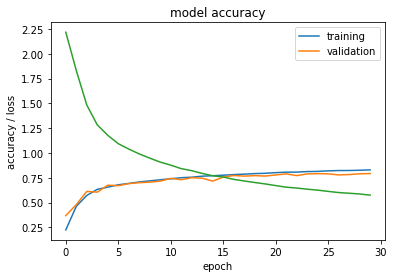

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()